In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("/content/netflix.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


**CLEANING**

In [6]:
#changing datatype of date_added column to datetime
#The variable 'date_added' has been categorised as an object (string), the most appropriate type of data for this variable would be datetime.
df["date_added"] = pd.to_datetime(df["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(8790, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
#The 'listed_in' variable can have several categories per media, we would like to create new variables to be able to extract this and correctly filter the data. We will assume that the first category would be the 'main' category of the movie.
df['listed_in1'] = 0
df['listed_in2'] = 0
df['listed_in3'] = 0
temp_cat = df.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df['listed_in1'][i] = temp_cat[i][0]
        df['listed_in2'][i] = 0
        df['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df['listed_in1'][i] = temp_cat[i][0]
        df['listed_in2'][i] = temp_cat[i][1]
        df['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df['listed_in1'][i] = temp_cat[i][0]
        df['listed_in2'][i] = temp_cat[i][1]
        df['listed_in3'][i] = temp_cat[i][2]

<ipython-input-11-b14b154b6744>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_in1'][i] = temp_cat[i][0]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-11-b14b154b6744>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_in2'][i] = 0
<ipython-input-11-b14b154b6744>:12: SettingWithCop

In [12]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [13]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,listed_in1,listed_in2,listed_in3
duration,,,,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
#There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.

In [15]:
df_tv = df[df.type == 'TV Show']
df_movie = df[df.type == 'Movie']

In [16]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [17]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [18]:
#Variable 'duration' has the wrong data type

In [19]:
#Whilst movies and TV shows were combined into a single dataframe, it was not possible to easily compare the length of these medias. However, now that they are separated each of these variables are not require to be kept as an object; but instead they should be integers.

In [20]:
temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

<ipython-input-20-07120a928e10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

<ipython-input-21-26f964bc9db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]


In [22]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [23]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


In [24]:
df_tv.describe()

,release_year,duration_seasons
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [25]:
df_movie.describe()

,release_year,duration_minutes
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


**ANALYZING**

In [26]:
df['month_added'] = df['date_added'].dt.month_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0,January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0,June


In [27]:
# added year_added column
df['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,September,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,September,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0,January,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0,September,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,December,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0,June,2018


In [28]:
# added day_added column
df['day_added']=df['date_added'].dt.day_name()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,September,2021,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,September,2021,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,September,2021,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,September,2021,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,September,2021,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0,January,2017,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0,September,2018,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas,December,2016,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0,June,2018,Saturday


In [29]:
#types of show on netflix
types =df.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6126
TV Show,2664


In [30]:
#grouped by directors of show and type
show_director= df.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [31]:
#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
127,Alastair Fothergill,TV Show,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2623,Marcus Raboy,Movie,15
2699,Martin Scorsese,Movie,12
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18


In [32]:
#grouped by country and type
show_origin= df.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
show_origin

,country,type,show_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [33]:
#write query to find top20 country
top20_country=show_origin.query("`show_count` >= 81")
top20_country

,country,type,show_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


In [34]:
#grouped by listed_In and type
show_genre= df.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [36]:
#grouped by rating and type
show_rating= df.groupby(['rating','type'])[ 'rating'].count().reset_index(name='ratings_count')
show_rating=show_rating.set_index('rating')
show_rating

,type,ratings_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,4
PG,Movie,287
PG-13,Movie,490
R,Movie,797
R,TV Show,2
TV-14,Movie,1427


In [37]:
# filtered  by type = movie

rating_movie= df.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
rating_movie=rating_movie.set_index('rating')
rating_movie

filter = rating_movie["type"]=="Movie"
  
# filtering data
rating_movie.where(filter, inplace = True)
rating_movie= rating_movie.dropna()
rating_movie

,type,ratings_count
rating,,
G,Movie,41.0
NC-17,Movie,3.0
NR,Movie,75.0
PG,Movie,287.0
PG-13,Movie,490.0
R,Movie,797.0
TV-14,Movie,1427.0
TV-G,Movie,126.0
TV-MA,Movie,2062.0


In [38]:
# filtered  by type = TV show

rating_TV= df.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
rating_TV=rating_TV.set_index('rating')
rating_TV

filter = rating_TV["type"]=="TV Show"
  
# filtering data
rating_TV.where(filter, inplace = True)
rating_TV= rating_TV.dropna()
rating_TV

,type,ratings_count
rating,,
NR,TV Show,4.0
R,TV Show,2.0
TV-14,TV Show,730.0
TV-G,TV Show,94.0
TV-MA,TV Show,1143.0
TV-PG,TV Show,321.0
TV-Y,TV Show,175.0
TV-Y7,TV Show,194.0
TV-Y7-FV,TV Show,1.0


In [41]:
#grouped by year_added and type
release_year= df.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count')
release_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


**VISUALIZATIONS**

In [57]:
df.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

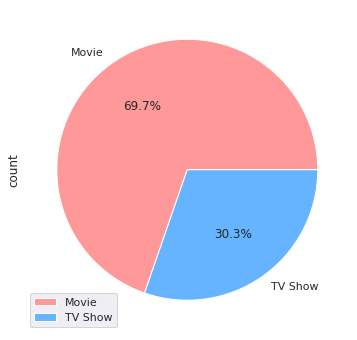

In [58]:
# percentage of types of show
colors = ['#ff9999','#66b3ff']
types.plot.pie(y='count',autopct='%.1f%%', figsize=(6,6),colors=colors)

Text(0, 0.5, 'Number of Movies/TV Shows')

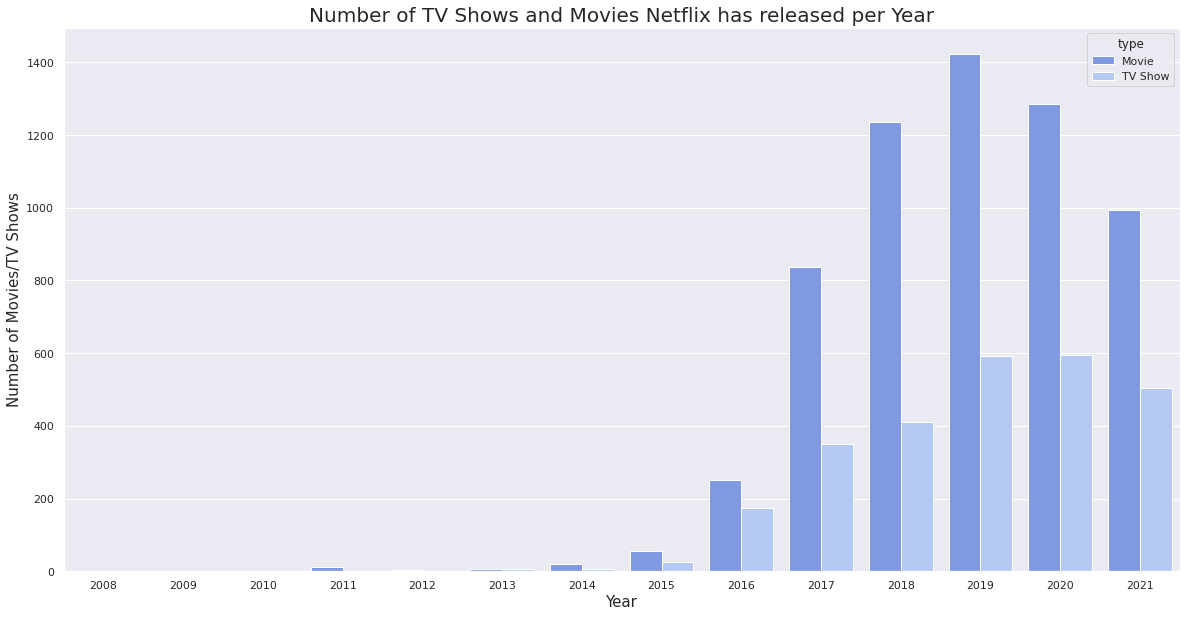

In [59]:
 plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df.date_added.dt.year, data=df, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)

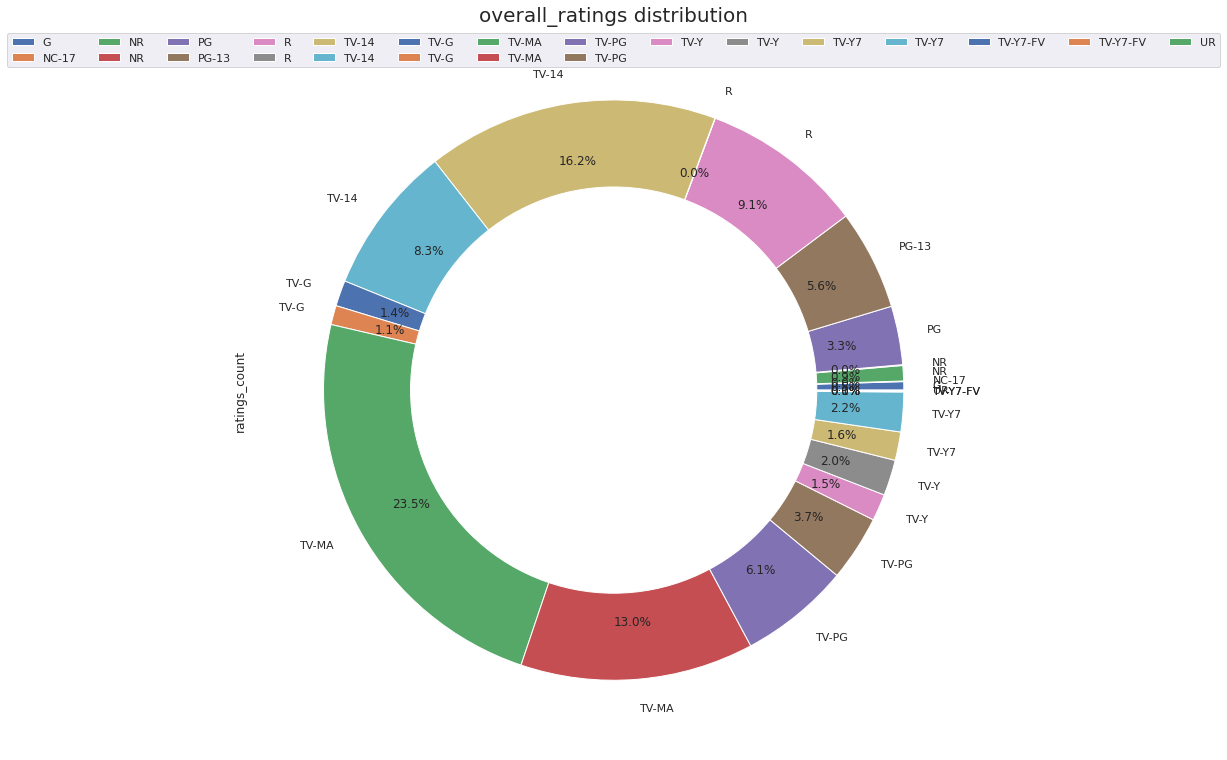

In [60]:
#overall rating
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80)
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

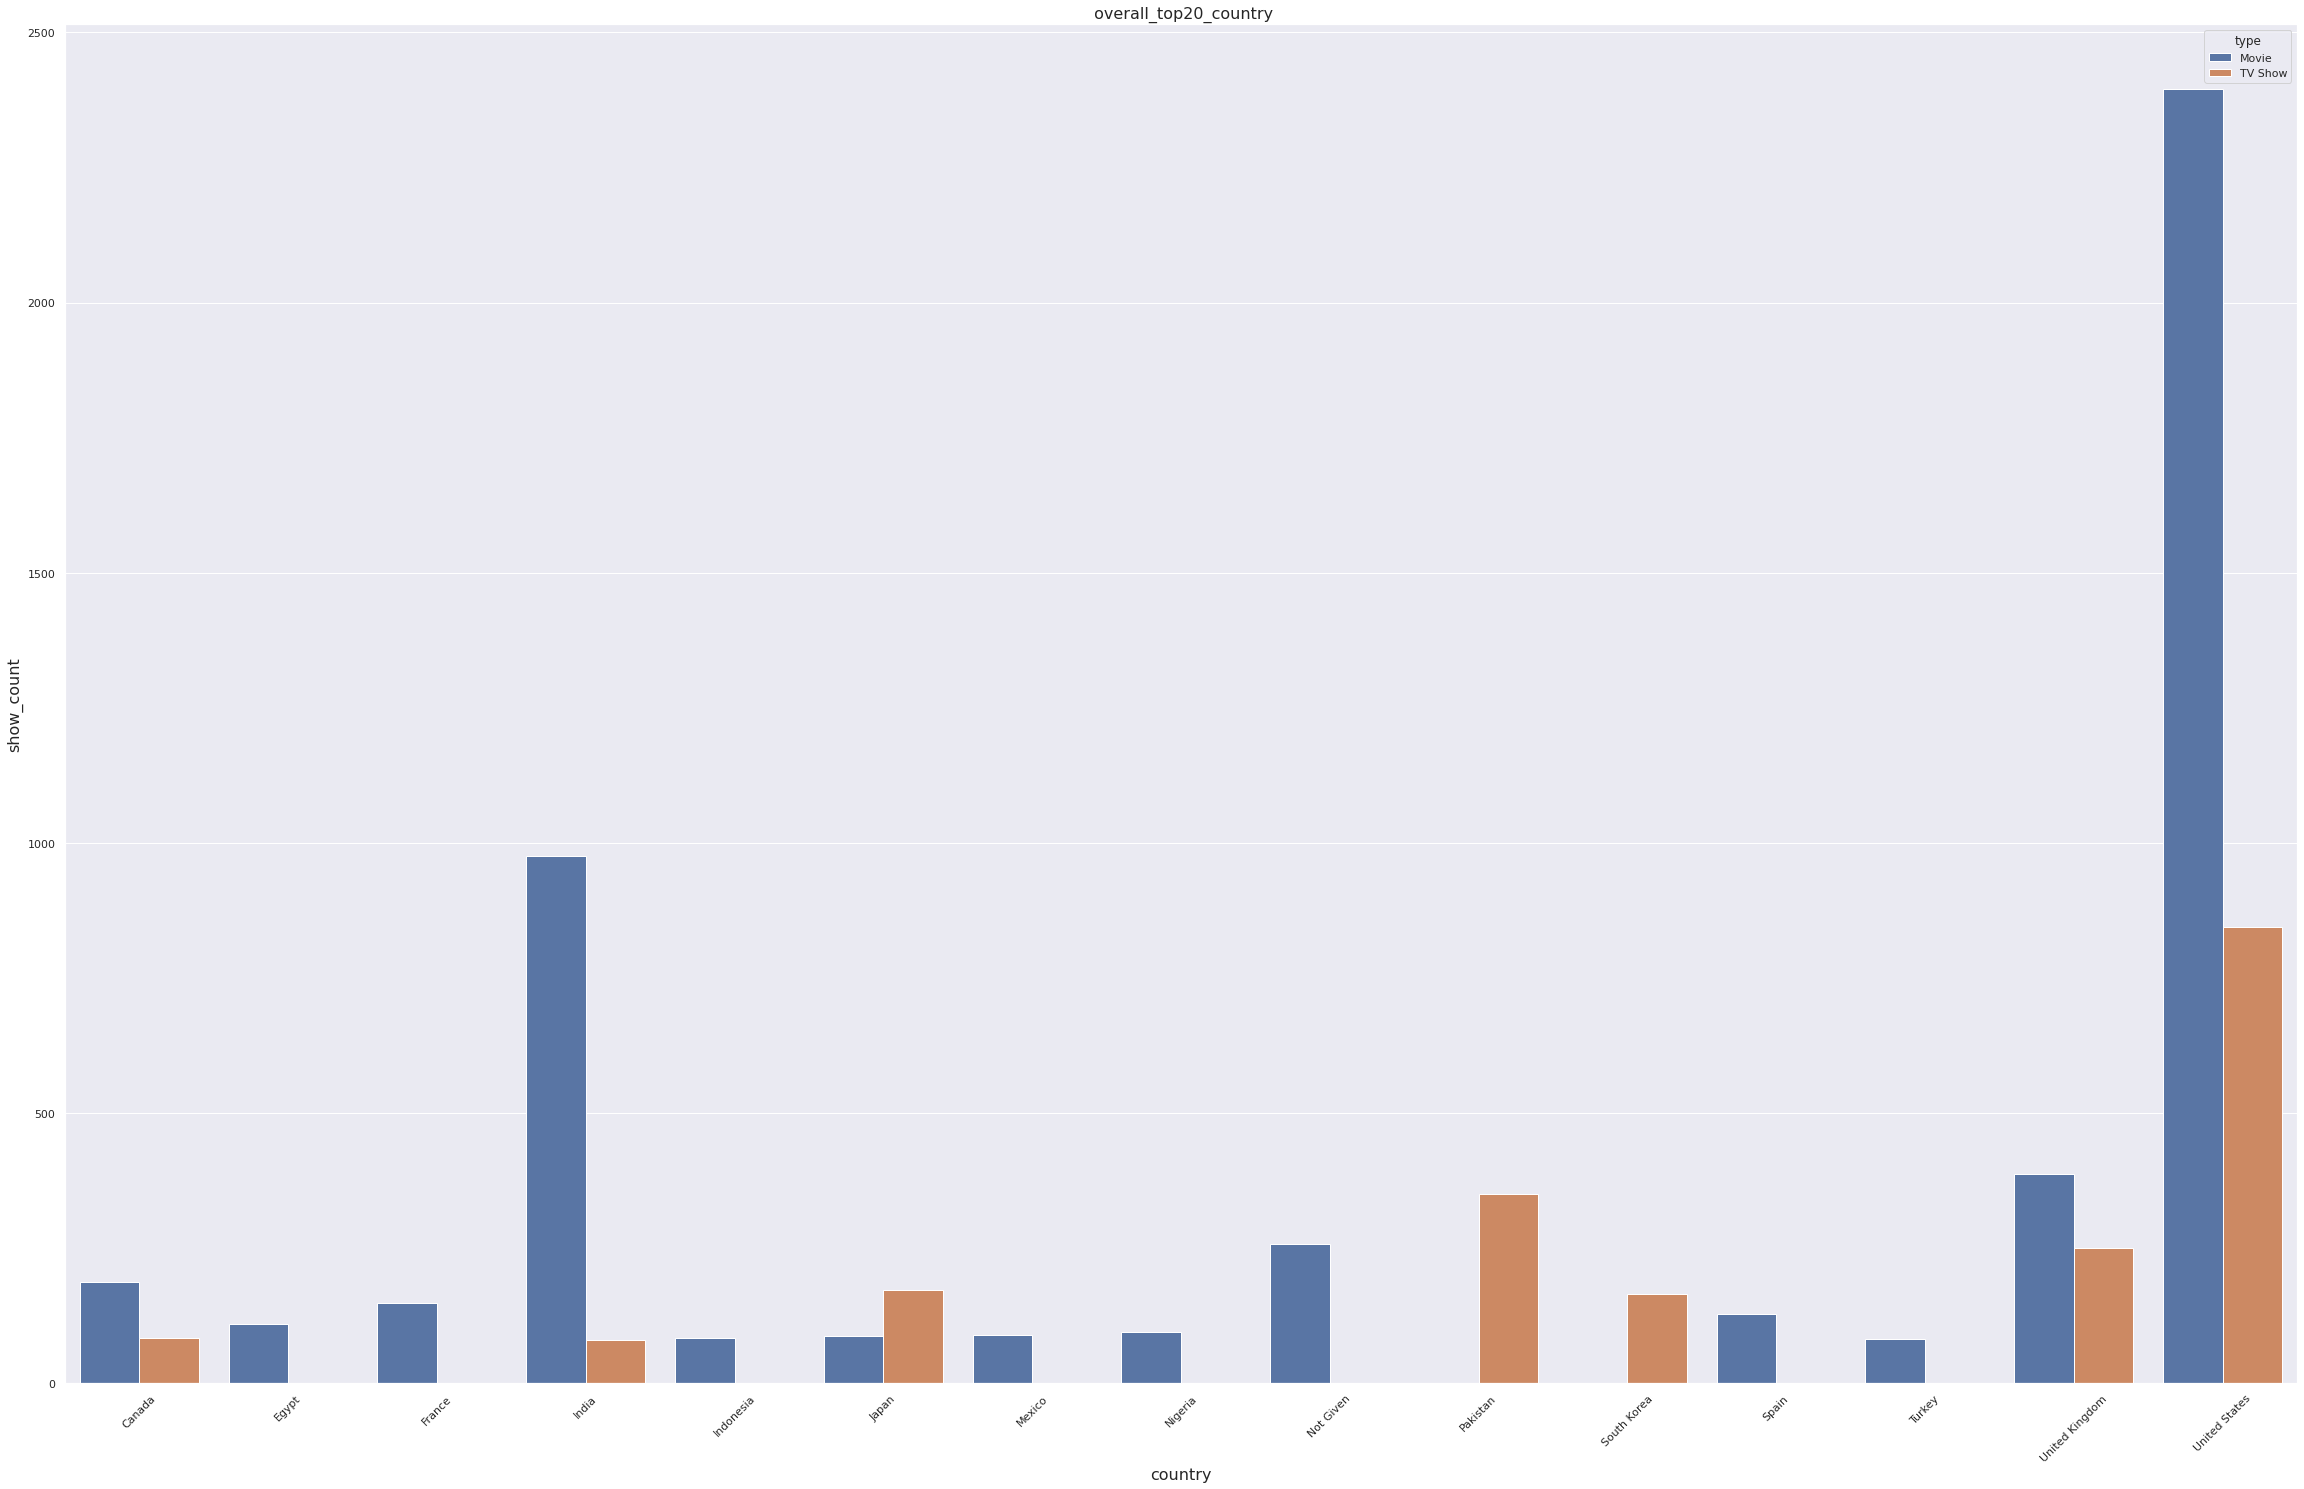

In [61]:
 sns.barplot(x =top20_country.reset_index()['country'], y=top20_country.reset_index()['show_count'],
            hue =  top20_country.reset_index()['type']);
plt.title(' overall_top20_country', fontsize=16)
plt.xlabel('country', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(40,25)})
plt.xticks(rotation = 45)

<ipython-input-62-d9f43f97289a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv_f = df_tv[ry_f][da_f]


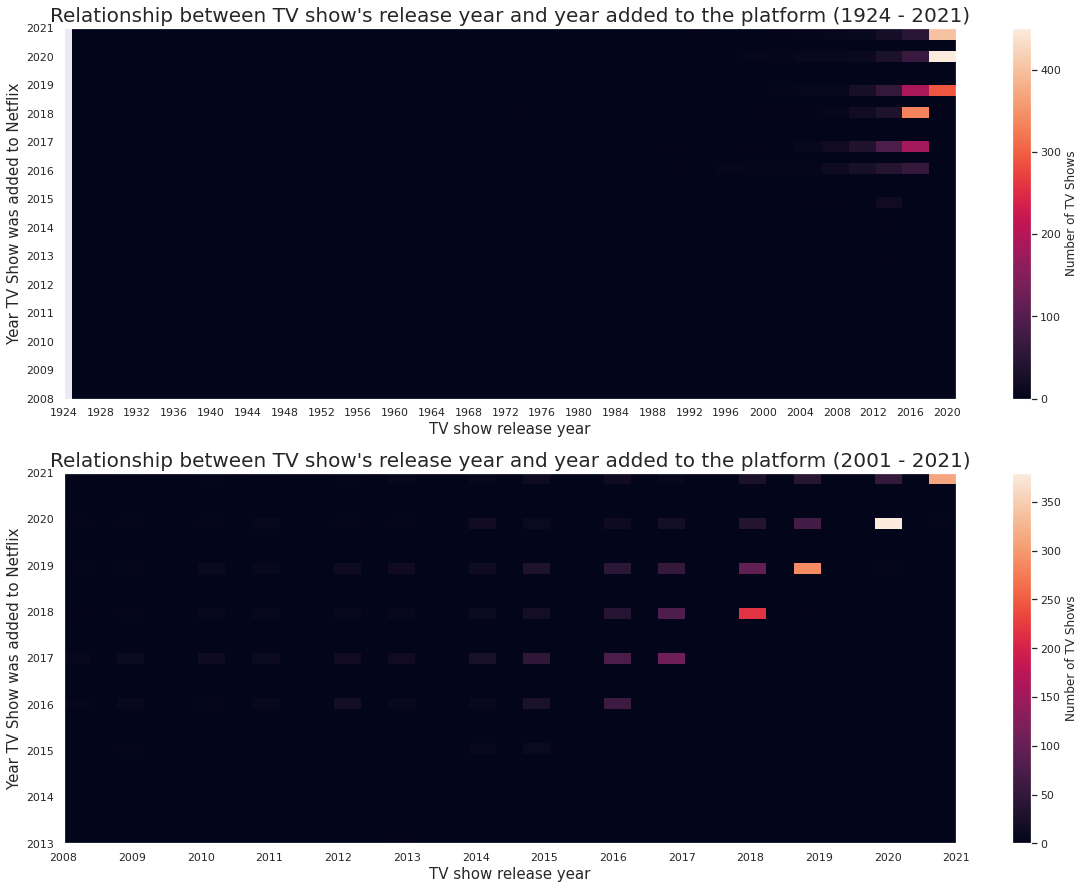

In [62]:
#In this section we would see the relationship between Netflix adding TV show to their catalog and their respective release date
plt.figure(figsize=[20,15])
bins=np.arange(1924,2025,4)
plt.subplot(2,1,1)
tv_rd = plt.hist2d(data=df_tv,x='release_year',y=df_tv.date_added.dt.year, bins=33)
plt.xticks(np.arange(1924,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

plt.subplot(2,1,2)
ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008
df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(2013,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')


<ipython-input-63-d1504fba98c8>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movie_f = df_movie[ry_f][da_f]


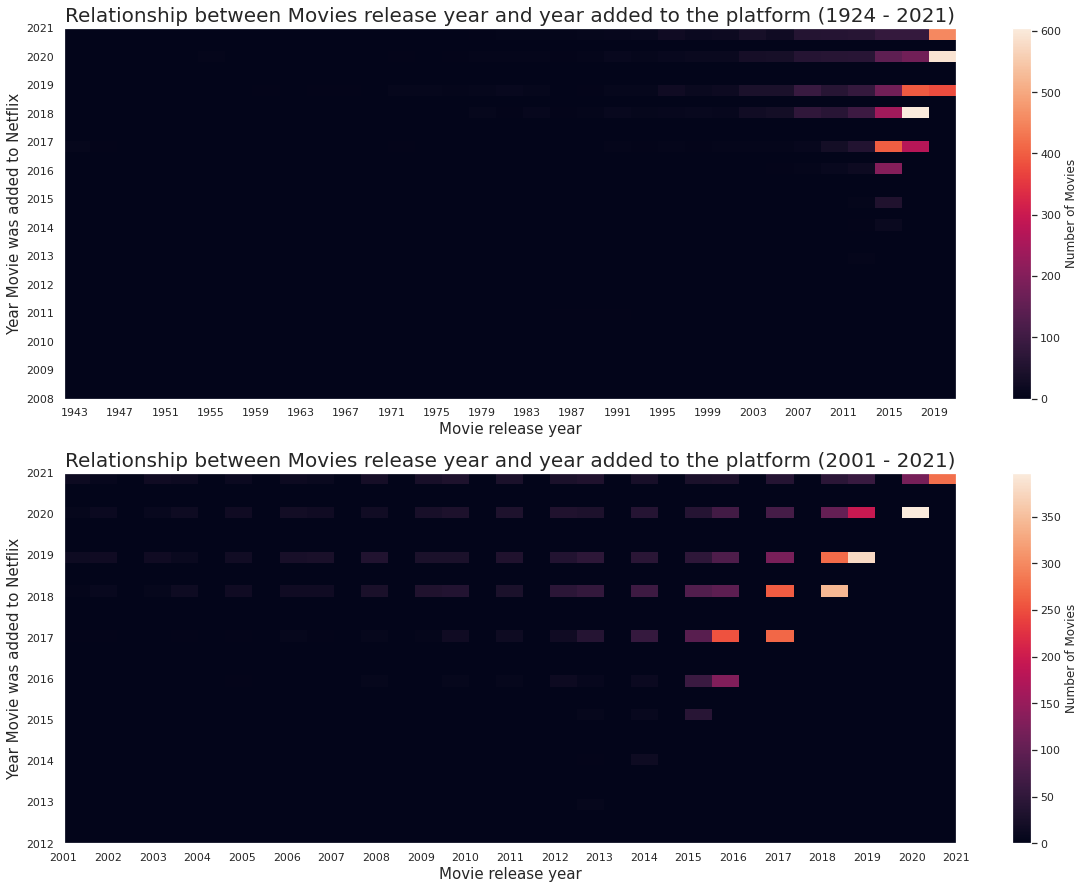

In [63]:
#In this section we would see the relationship between Netflix adding Movie to their catalog and their respective release date
plt.figure(figsize=[20,15])
bins=np.arange(1943,2025,4)
plt.subplot(2,1,1)
movie_rd = plt.hist2d(data=df_movie,x='release_year',y=df_movie.date_added.dt.year, bins=33)
plt.xticks(np.arange(1943,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('Movie release year',fontsize = 15)
plt.ylabel('Year Movie was added to Netflix',fontsize = 15)
plt.title("Relationship between Movies release year and year added to the platform (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of Movies')

plt.subplot(2,1,2)
ry_f = df_movie.release_year>2000
da_f = df_movie.date_added.dt.year>2011
df_movie_f = df_movie[ry_f][da_f]
movie_rd1 = plt.hist2d(data=df_movie_f,x='release_year',y=df_movie_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2001,2022,1));
plt.yticks(np.arange(2012,2022,1));
plt.xlabel('Movie release year',fontsize = 15)
plt.ylabel('Year Movie was added to Netflix',fontsize = 15)
plt.title("Relationship between Movies release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of Movies')
